loading the dataset

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns

In [205]:
df=pd.read_csv('red_wine.csv')
df

,sno,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [206]:
df=df.drop('sno',axis=1)

In [207]:
df.dtypes

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

visualisation

univariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

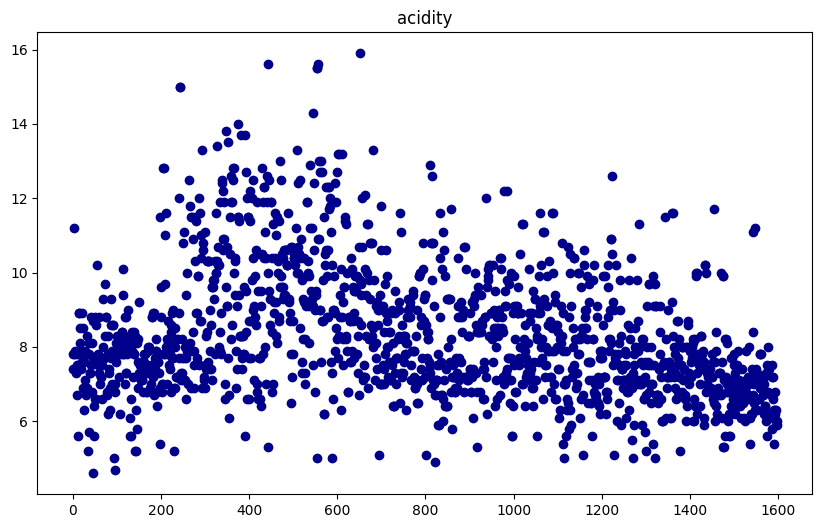

In [208]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index,df['fixed.acidity'],c="Darkblue")
plt.title('acidity')
plt.show

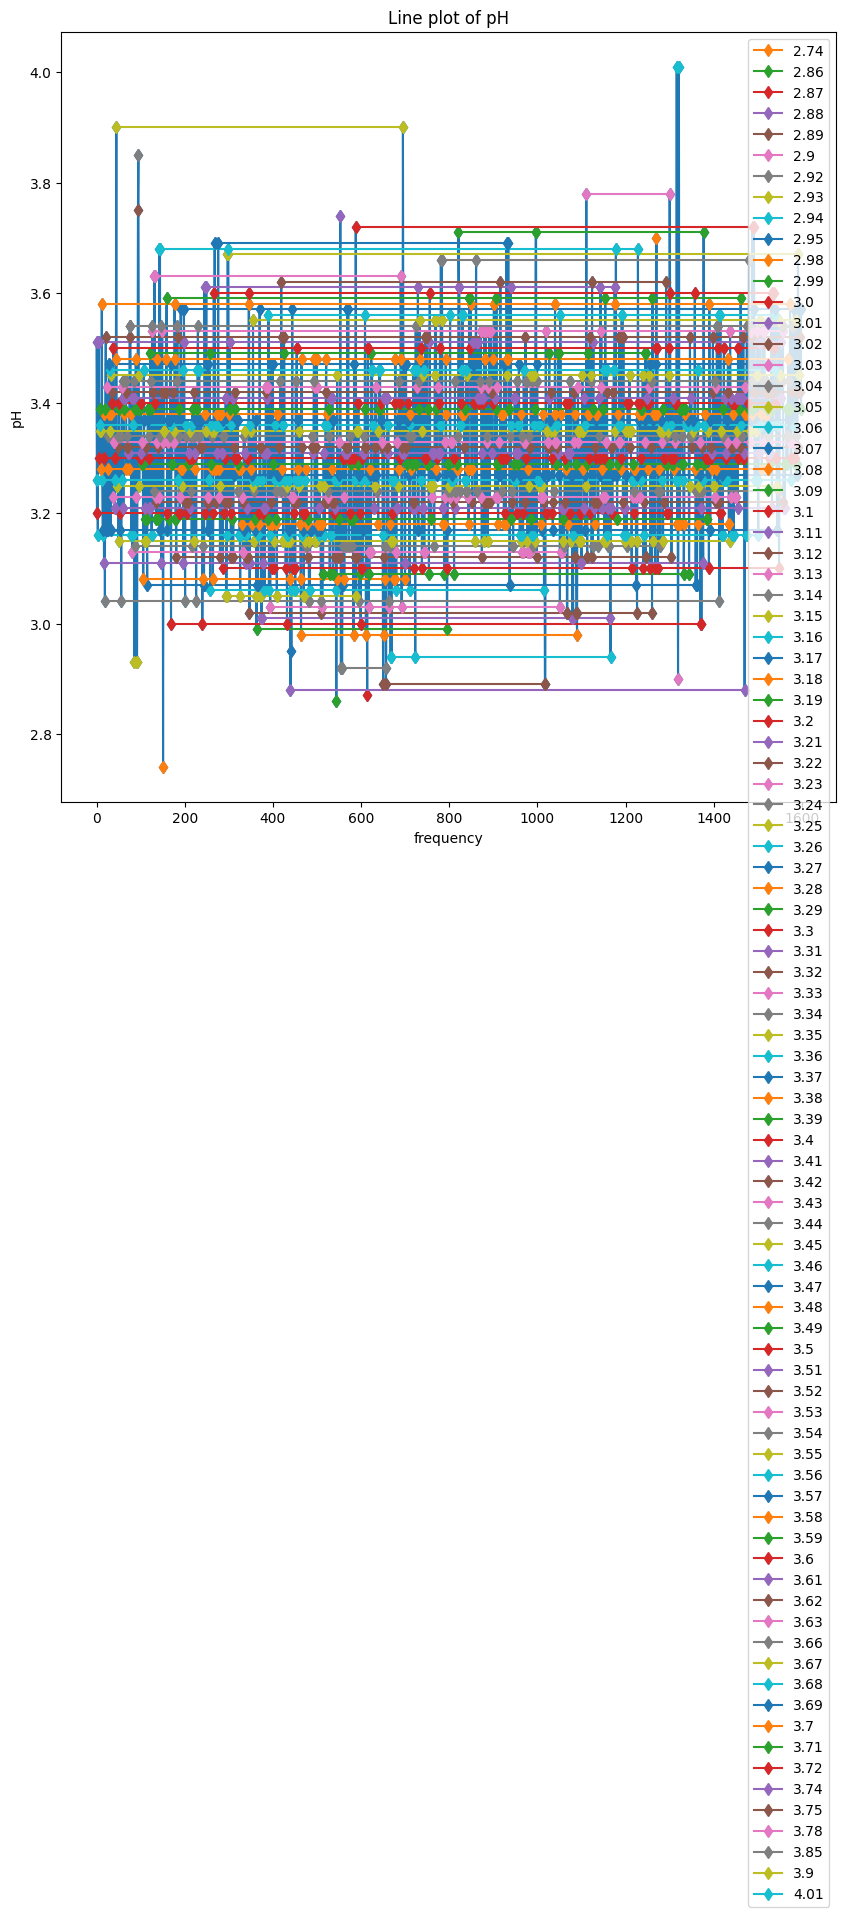

In [209]:
plt.figure(figsize=(10,10))
plt.title('Line plot of pH')
plt.xlabel('frequency',fontsize=10)
plt.ylabel('pH',fontsize=10)
plt.plot(df.index,df['pH'],markevery=1,marker='d')
for name, group in df.groupby('pH'):
  plt.plot(group.index, group['pH'],label=name,markevery=1,marker='d')
plt.legend()
plt.show()

<Axes: ylabel='residual.sugar'>

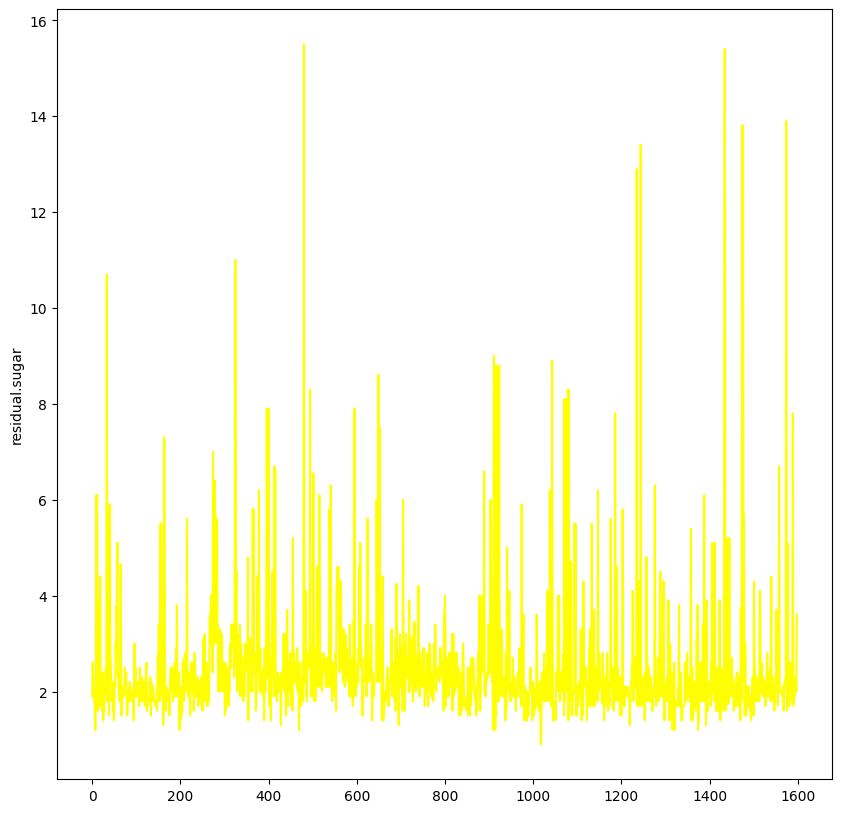

In [210]:
plt.figure(figsize=(10,10))
sns.lineplot(df['residual.sugar'],c="yellow")

<function matplotlib.pyplot.show(close=None, block=None)>

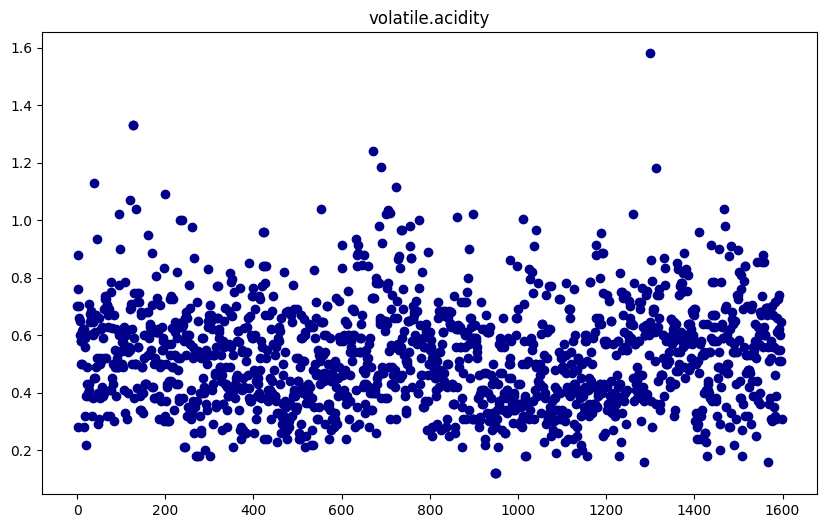

In [211]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index,df['volatile.acidity'],c="DarkBlue")
plt.title('volatile.acidity')
plt.show

(array([  8.,  27.,  90., 250., 485., 450., 185.,  74.,  19.,  11.]),
 array([0.99007 , 0.991432, 0.992794, 0.994156, 0.995518, 0.99688 ,
        0.998242, 0.999604, 1.000966, 1.002328, 1.00369 ]),
 <BarContainer object of 10 artists>)

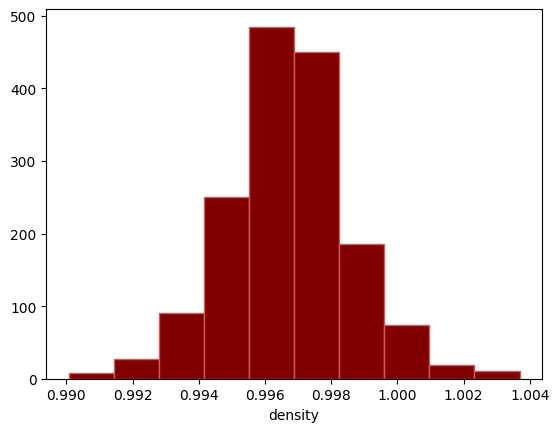

In [212]:
plt.xlabel('density')
plt.hist(df['density'],edgecolor="indianred",color="maroon")

<ipython-input-213-cdc62736499b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sulphates'], shade=True, color='mistyrose')


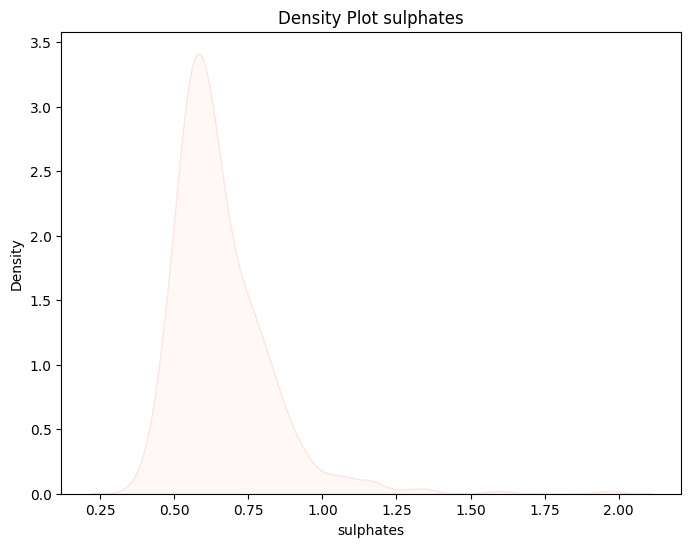

In [213]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['sulphates'], shade=True, color='mistyrose')
plt.title('Density Plot sulphates')
plt.xlabel('sulphates')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='free.sulfur.dioxide'>

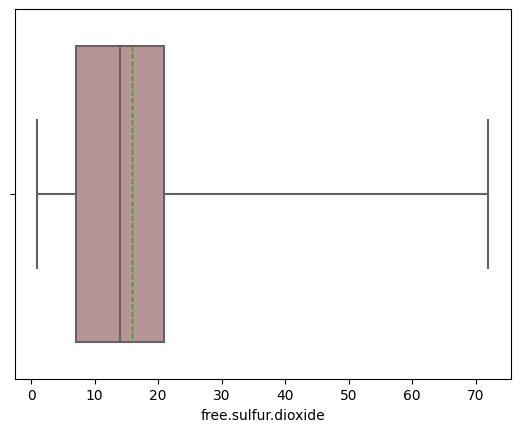

In [214]:
sns.boxplot(x="free.sulfur.dioxide", data=df, whis=5, color='rosybrown', showmeans=True, meanline=True)

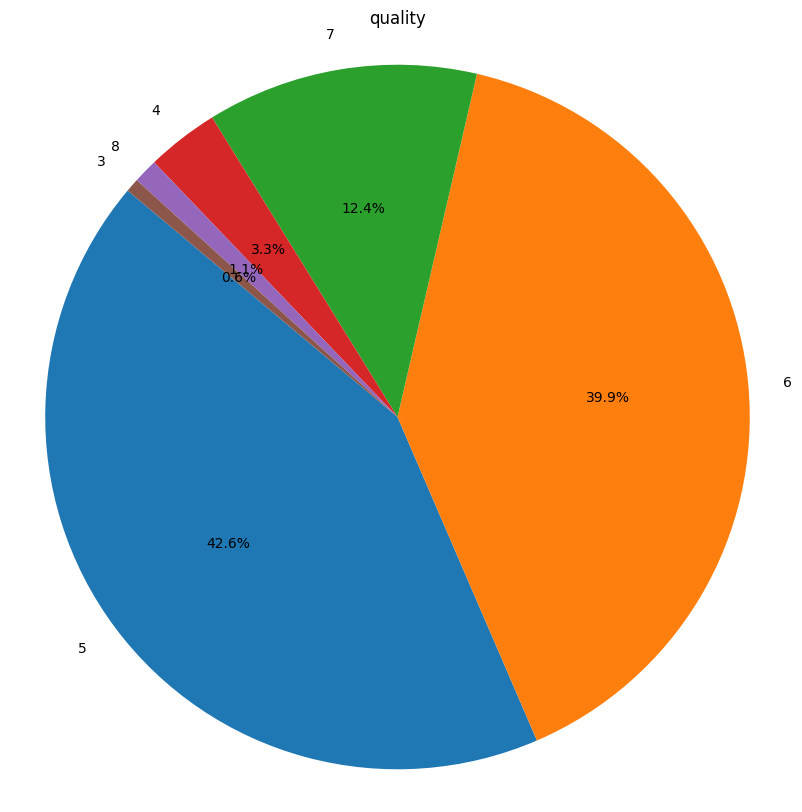

In [215]:
category_counts = df['quality'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('quality')
plt.show()

bivariate analysis

<Axes: xlabel='quality', ylabel='fixed.acidity'>

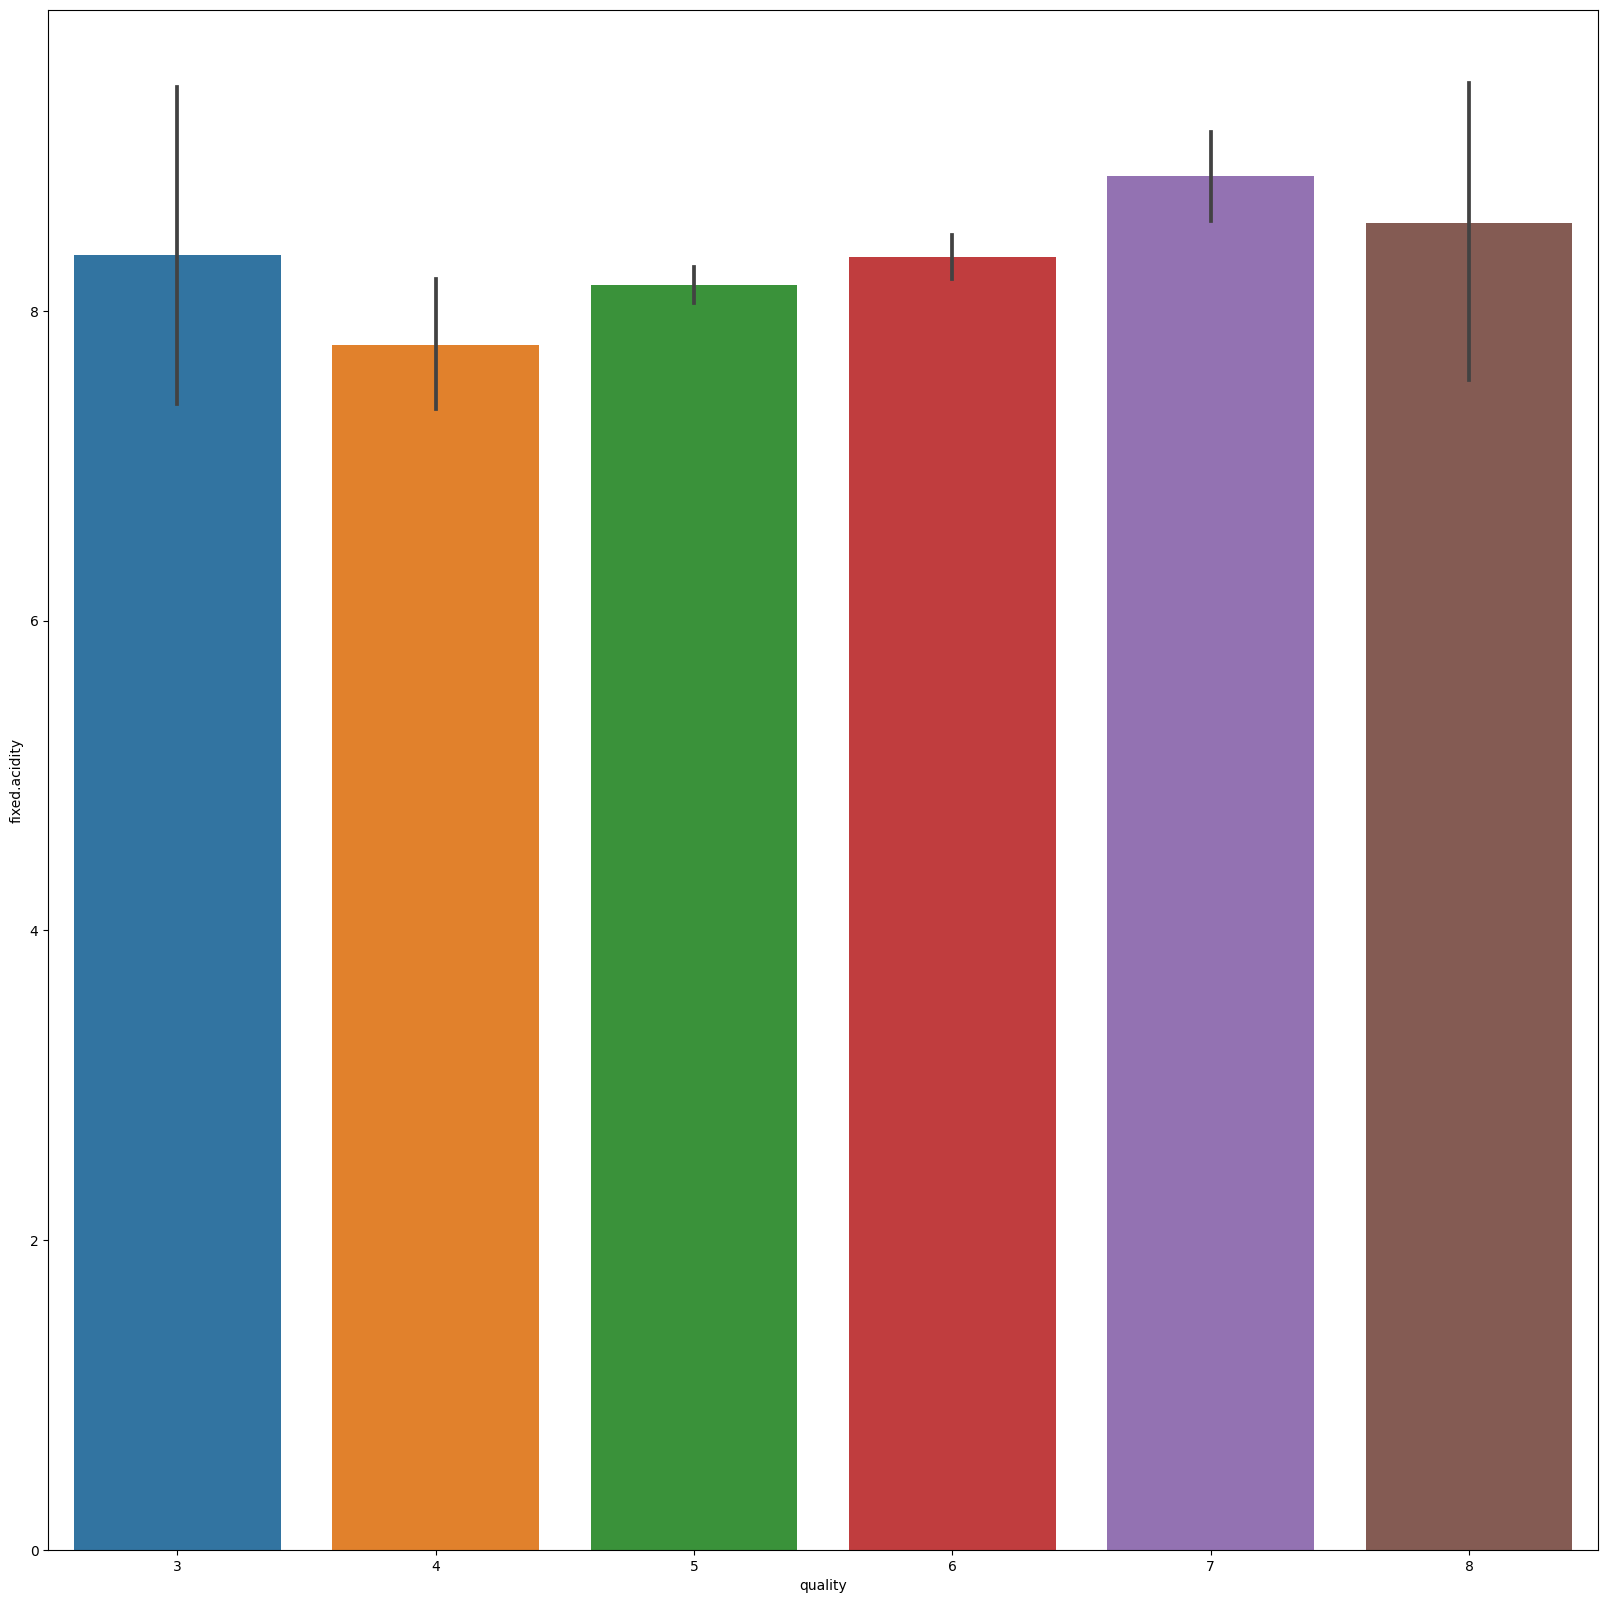

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.barplot(y=df['fixed.acidity'], x=df['quality'])

<Axes: xlabel='quality', ylabel='citric.acid'>

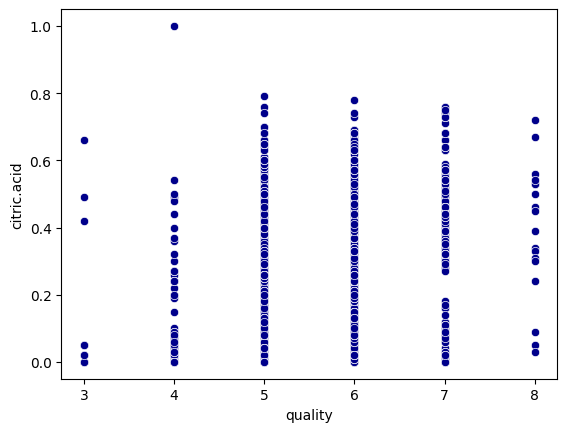

In [130]:
sns.scatterplot(x=df['quality'],
                y=df['citric.acid'],c="DarkBlue")

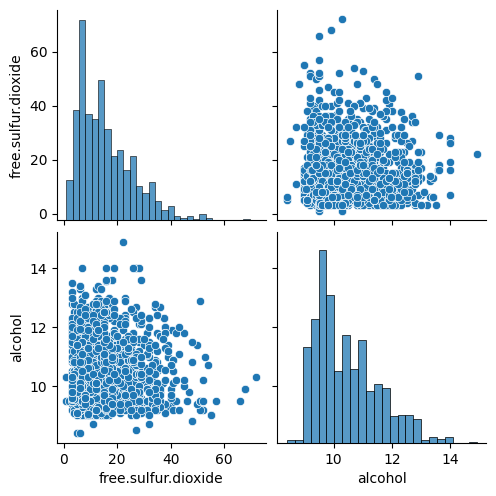

In [131]:
# Pair plot (for multiple variables)
sns.pairplot(df, vars=['free.sulfur.dioxide', 'alcohol'])
plt.show()

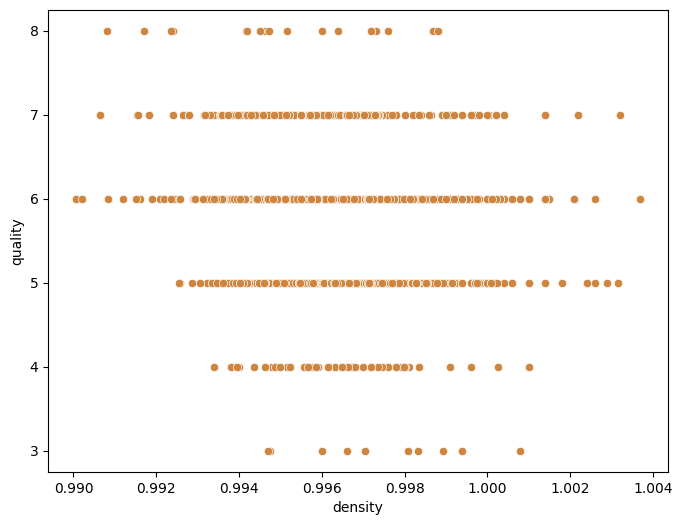

In [132]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='density', y='quality',c='peru')
plt.xlabel('density')
plt.ylabel('quality')
plt.show()

multivariate analysis

In [133]:
selected_vars1 = ['fixed.acidity', 'residual.sugar', 'total.sulfur.dioxide', 'density']

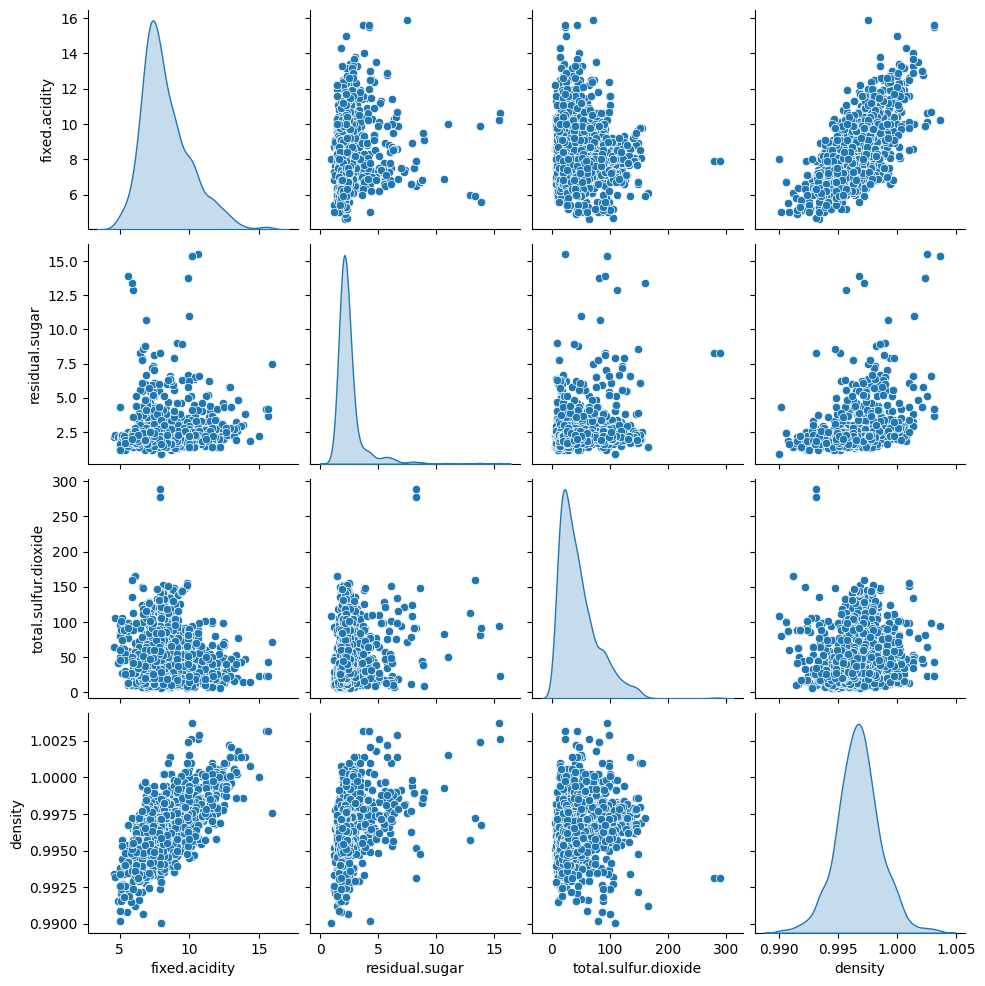

In [134]:
#color = sns.color_palette("pastel")
sns.pairplot(df[selected_vars1], diag_kind='kde')
plt.show()

In [135]:
correlation_matrix = df[selected_vars1].corr()

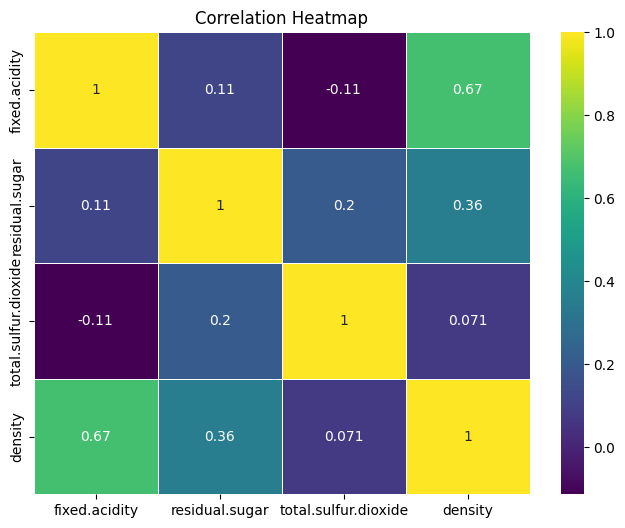

In [136]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-137-4623faf546f3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'red')
<ipython-input-137-4623faf546f3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'red')
<ipython-input-137-4623faf546f3>:8: Us

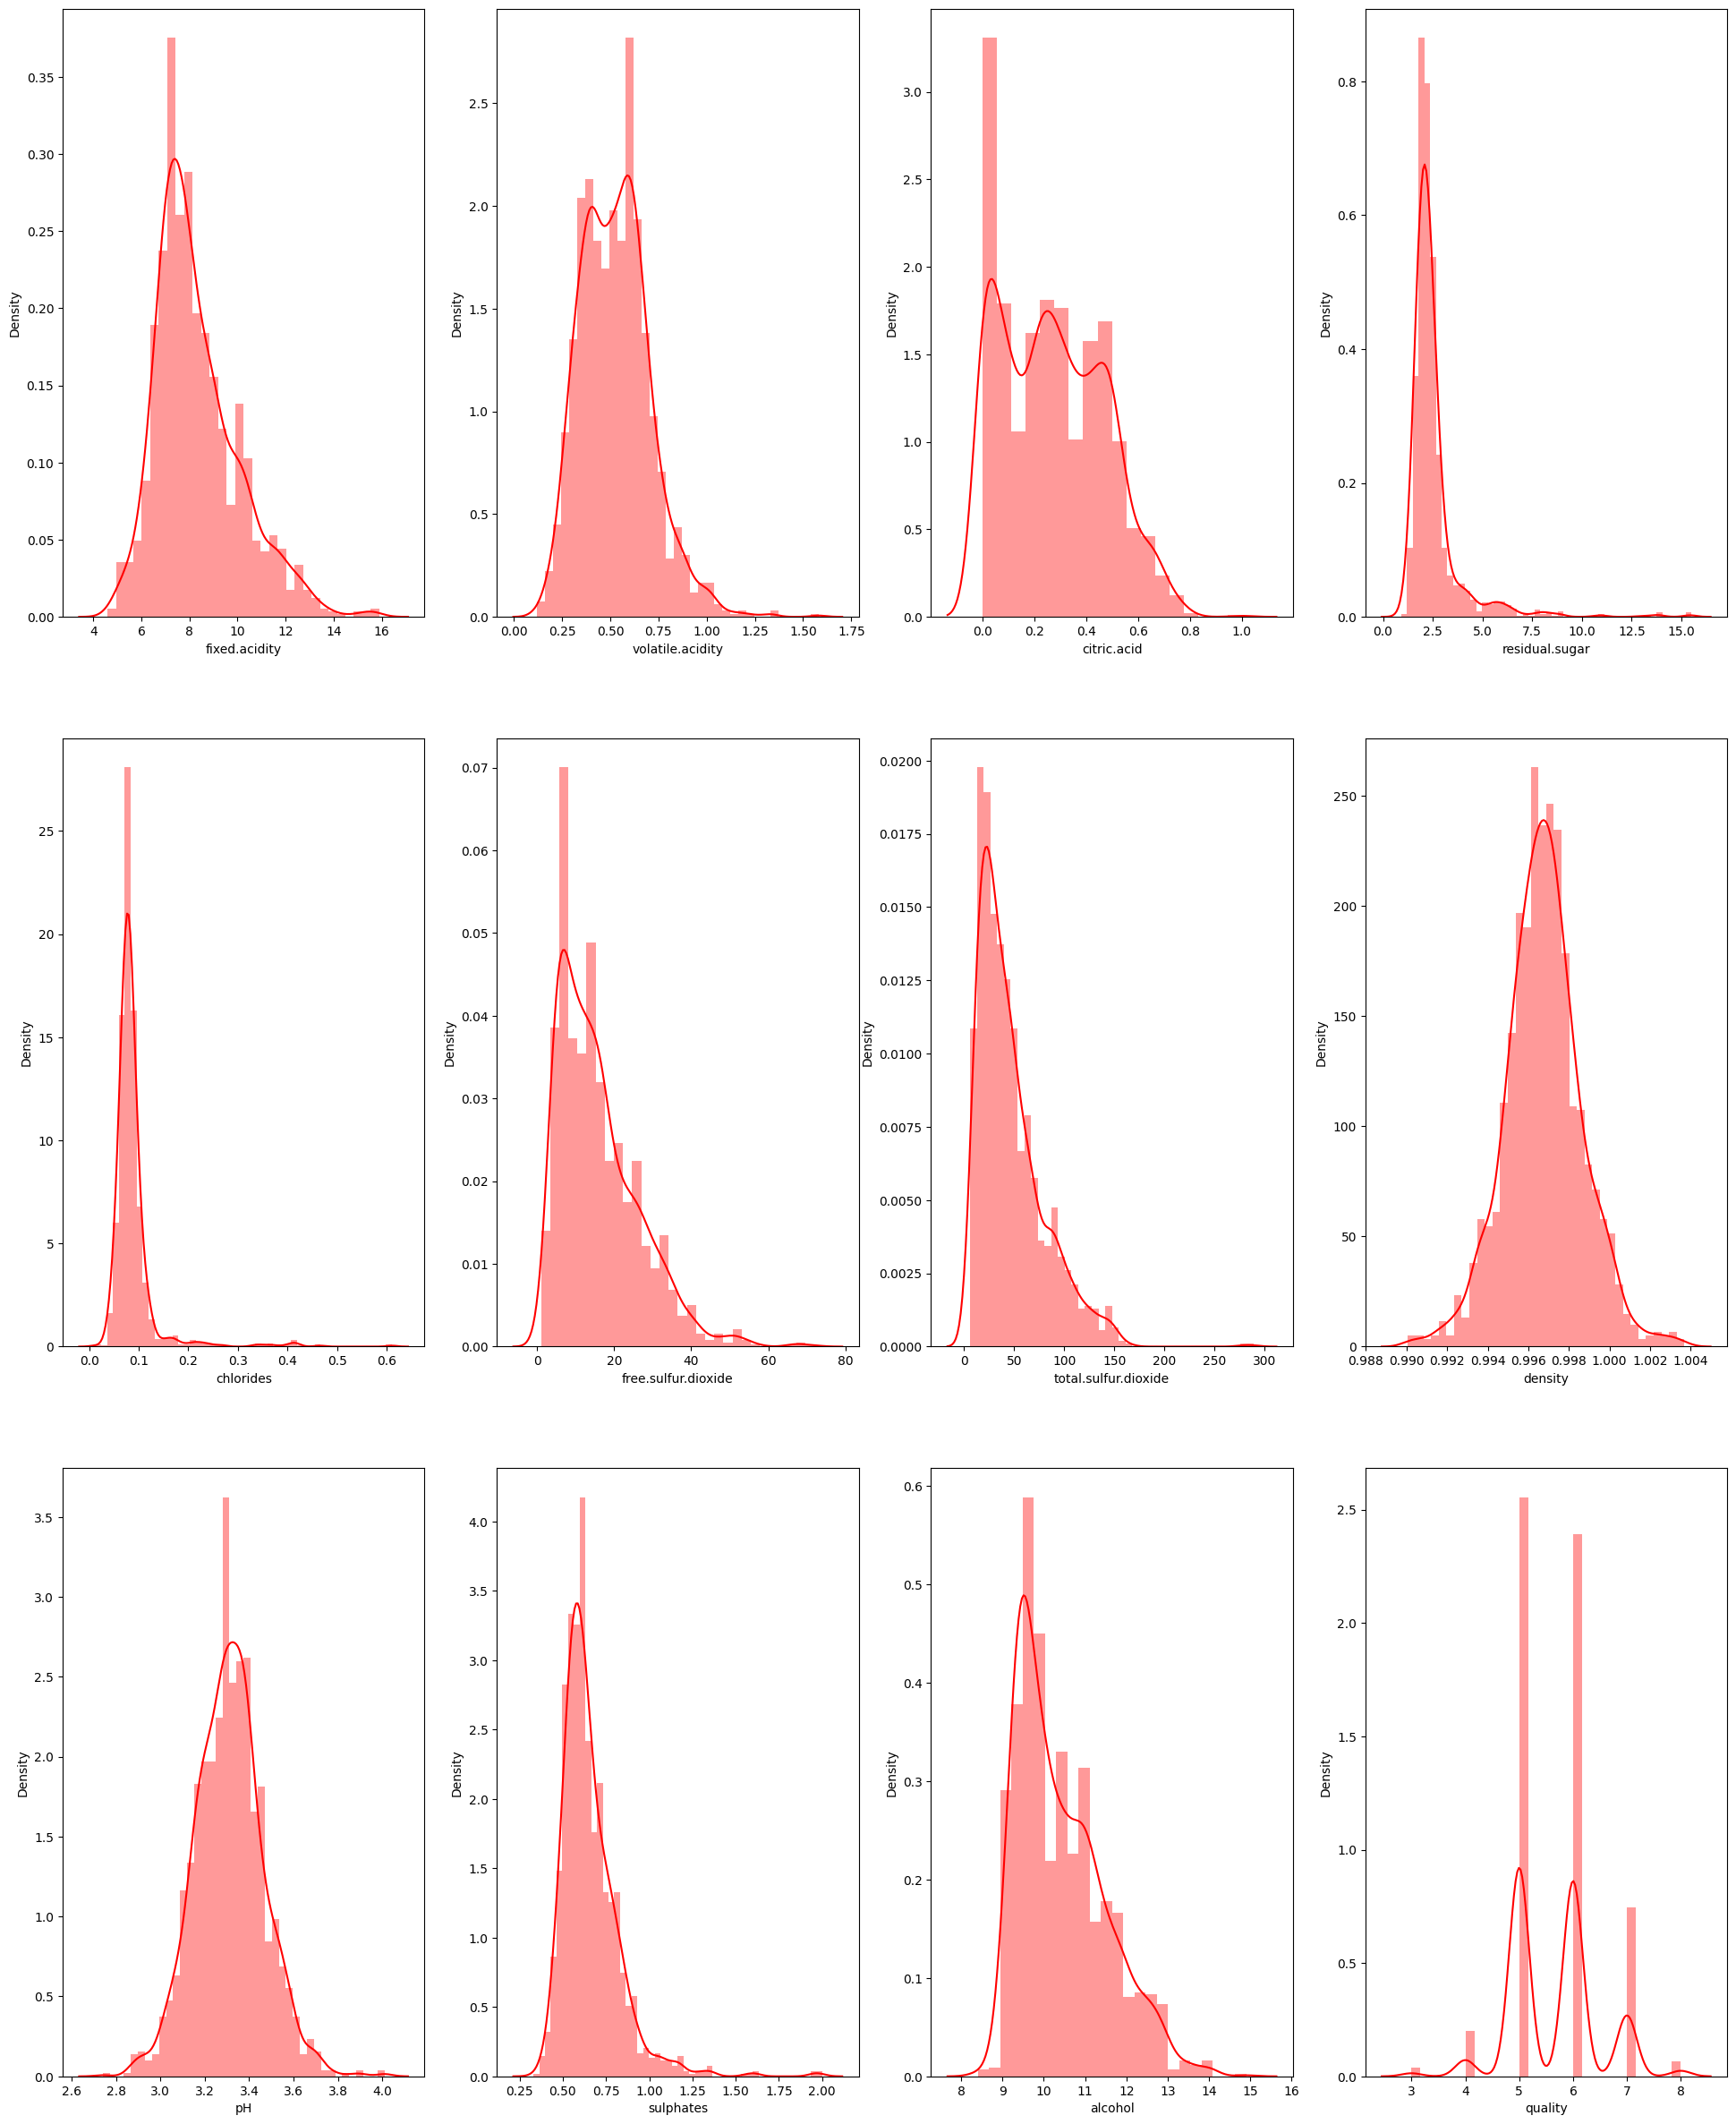

In [137]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

In [138]:
df.corr()['quality']

fixed.acidity           0.124052
volatile.acidity       -0.390558
citric.acid             0.226373
residual.sugar          0.013732
chlorides              -0.128907
free.sulfur.dioxide    -0.050656
total.sulfur.dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

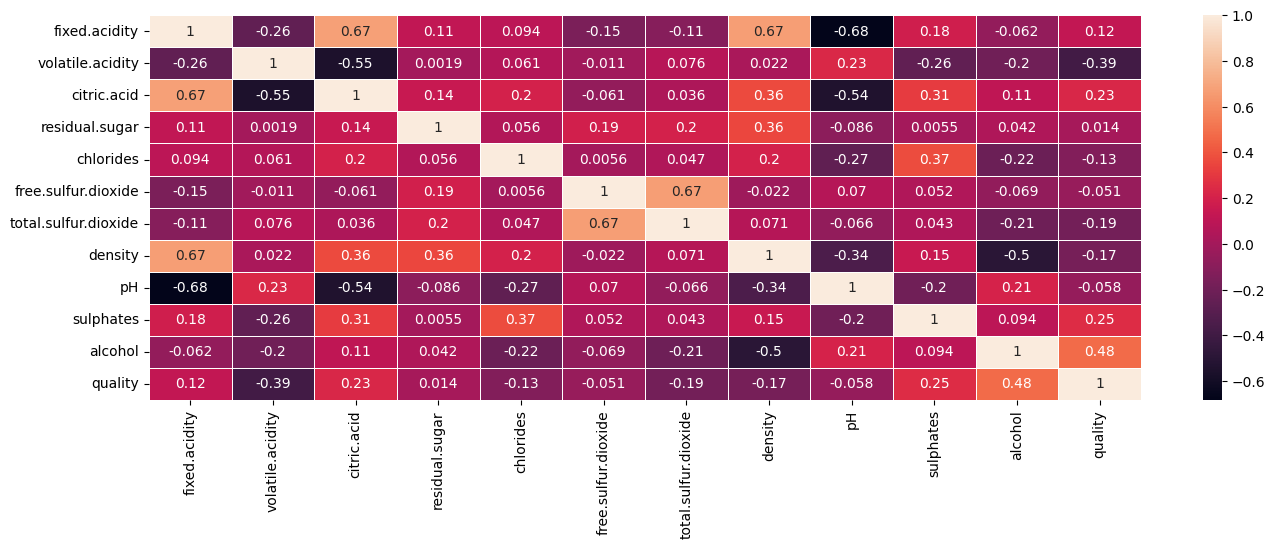

In [140]:
plt.figure(figsize = (16,5))
ax = sns.heatmap(df.corr(), annot=True, linewidths=.5)

data preprocessing

discriptive statistics

In [141]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


missing values

In [143]:
df.isnull().any()

fixed.acidity           False
volatile.acidity        False
citric.acid             False
residual.sugar          False
chlorides               False
free.sulfur.dioxide     False
total.sulfur.dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [144]:
#df = df.dropna(axis=0)
df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

handling outliers

In [145]:
df.describe()[['residual.sugar', 'chlorides', 'free.sulfur.dioxide',	'total.sulfur.dioxide']]

,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,2.538806,0.087467,15.874922,46.467792
std,1.409928,0.047065,10.460157,32.895324
min,0.900000,0.012000,1.000000,6.000000
25%,1.900000,0.070000,7.000000,22.000000
50%,2.200000,0.079000,14.000000,38.000000
75%,2.600000,0.090000,21.000000,62.000000
max,15.500000,0.611000,72.000000,289.000000


<function matplotlib.pyplot.show(close=None, block=None)>

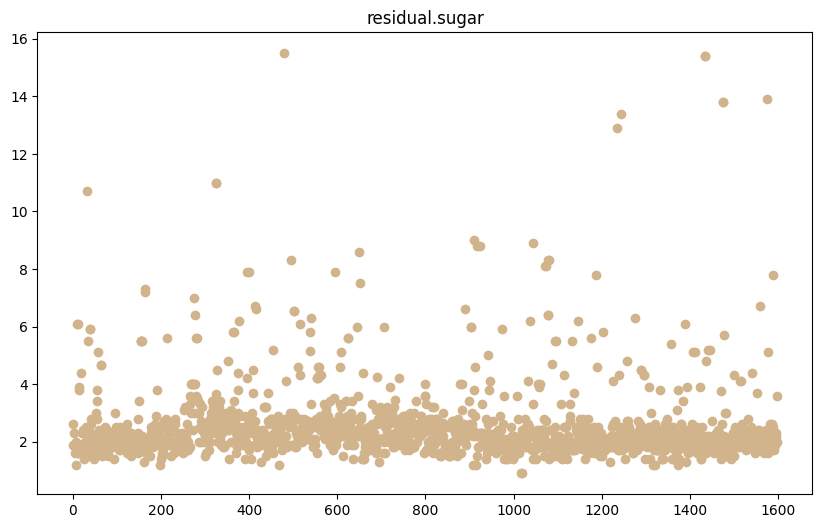

In [146]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index,df['residual.sugar'],c="tan")
plt.title('residual.sugar')
plt.show

multivariate outliers

In [147]:
df['residual.sugar'].mean()

2.53880550343965

In [148]:
df['residual.sugar'].std()

1.4099280595072798

In [149]:
upper_lim=df['residual.sugar'].mean()+3*df['residual.sugar'].std()
upper_lim

6.7685896819614895

In [150]:
lower_lim=df['residual.sugar'].mean()-3*df['residual.sugar'].std()
lower_lim

-1.6909786750821896

In [151]:
#outliers
df[(df['residual.sugar'] <= lower_lim) | (df['residual.sugar'] >= upper_lim)]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
163,7.4,0.600,0.26,7.3,0.070,36.0,121.0,0.99820,3.37,0.49,9.4,5
164,7.3,0.590,0.26,7.2,0.070,35.0,121.0,0.99810,3.37,0.49,9.4,5
274,7.5,0.650,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4,5
324,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5
494,6.5,0.390,0.23,8.3,0.051,28.0,91.0,0.99520,3.44,0.55,12.1,6


In [152]:
df[(df['residual.sugar'] >= lower_lim) & (df['residual.sugar'] <= upper_lim)]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [153]:
df['total.sulfur.dioxide'].mean()

46.46779237023139

In [154]:
df['total.sulfur.dioxide'].std()

32.895324478299074

In [155]:
upper_lim=df['total.sulfur.dioxide'].mean()+3*df['total.sulfur.dioxide'].std()
upper_lim

145.15376580512861

In [156]:
lower_lim=df['total.sulfur.dioxide'].mean()-3*df['total.sulfur.dioxide'].std()
lower_lim

-52.21818106466583

In [157]:
#outliers
df[(df['total.sulfur.dioxide'] <= lower_lim) | (df['total.sulfur.dioxide'] >= upper_lim)]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5
591,6.6,0.390,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5,6
636,9.6,0.880,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,5
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6
651,9.8,0.880,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5


In [158]:
df[(df['total.sulfur.dioxide'] >= lower_lim) & (df['total.sulfur.dioxide'] <= upper_lim)]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [159]:
df['total.sulfur.dioxide'].sample()

1390    33.0
Name: total.sulfur.dioxide, dtype: float64

splitting the data into testing and training

In [160]:
X=df.iloc[:,:11]
y=df['quality']

In [161]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=100)

training and testing data shape

In [162]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (1279, 11)
X_test :  (320, 11)
y_train :  (1279,)
y_test :  (320,)


scaling the dataset

In [163]:
# trans = StandardScaler()
# X_train = trans.fit_transform(X_train)
# X_test=trans.fit_transform(X_test)
# X_train
# X_test

machine learning model

In [164]:
from sklearn.linear_model import LinearRegression
multilinear=LinearRegression()
multilinear.fit(X_train,y_train)

LinearRegression()

In [165]:
y_pred=multilinear.predict(X_test)

In [166]:
y_pred

array([5.67839999, 6.39022478, 5.34019777, 4.90500304, 5.61509251,
       6.7840186 , 4.95866835, 6.11085923, 6.05125456, 6.54608365,
       6.55385489, 5.29413558, 5.68205982, 5.12764759, 5.75346269,
       4.81193058, 6.07382107, 5.04521738, 5.49702562, 5.39709084,
       5.96937258, 5.3658837 , 5.75597998, 6.01077427, 6.24667385,
       6.09949733, 5.94054766, 5.21232925, 5.38559771, 5.61583996,
       5.23154393, 5.40967751, 6.16953447, 5.94388858, 5.37033713,
       5.8823932 , 5.77358629, 5.42418416, 5.21820289, 5.00472017,
       4.96307794, 6.13842937, 5.61588809, 5.73346509, 5.96846353,
       5.75389667, 5.43038026, 6.31736259, 4.85728853, 6.2345996 ,
       5.49235006, 5.37974906, 5.7473276 , 5.61480709, 6.08875386,
       6.20923996, 6.50052431, 6.1334585 , 5.23782944, 5.40516401,
       6.69449443, 5.54532753, 6.04173726, 6.57349336, 5.40211661,
       4.75599036, 5.56186006, 5.47164451, 4.87911077, 5.99321668,
       5.46893041, 6.76958188, 6.75978506, 6.55975164, 6.42305

In [167]:
y_test

1254    5
1087    6
822     5
1514    6
902     7
       ..
903     7
1512    6
941     7
1190    6
1496    5
Name: quality, Length: 320, dtype: int64

evaluation

In [168]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)

In [169]:
accuracy

0.3175558984264637

In [170]:
import statsmodels.api as sm
x=sm.add_constant(X_train)
m=sm.OLS(y_train,x).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     67.18
Date:                Fri, 22 Sep 2023   Prob (F-statistic):          3.44e-118
Time:                        14:25:39   Log-Likelihood:                -1252.8
No. Observations:                1279   AIC:                             2530.
Df Residuals:                    1267   BIC:                             2591.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   25.6255 

testing random value

In [171]:
print(multilinear.predict([[9,0.01,0,5,0.001,30,50,0.95,3,0.9,15]]))
input=[[7.8, 0.600, 0.00, 1.6, 0.058, 12.0, 34.0, 0.8700,	5.00,	0.56,	9.0]]
output_sample=multilinear.predict(input)
output_sample

[9.13233848]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.23974093])

random forest classifier

In [172]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error
import numpy as np

In [173]:
# Create a RandomForestClassifier
rnd = RandomForestClassifier()

# Fit the model to the training data
rnd.fit(X_train, y_train)

RandomForestClassifier()

In [174]:
rnd_score = rnd.score(X_test, y_test)
print('Accuracy score of the model is:', rnd_score)

# Display error metrics
print('Calculating the error metrics')

Accuracy score of the model is: 0.75625
Calculating the error metrics


In [175]:
y_predict = rnd.predict(X_test)
y_pred_train=rnd.predict(X_train)

In [176]:
# Calculate mean squared error (MSE)
rnd_MSE = mean_squared_error(y_test, y_predict)
# Calculate root mean squared error (RMSE)
rnd_RMSE = np.sqrt(rnd_MSE)

# Display MSE and RMSE
print('Mean Squared Error (MSE) is:', rnd_MSE)
print('Root Mean Squared Error (RMSE) is:', rnd_RMSE)

# Display classification report for the predictions
print(classification_report(y_predict, y_test))

Mean Squared Error (MSE) is: 0.3875
Root Mean Squared Error (RMSE) is: 0.6224949798994366
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.81      0.82      0.82       131
           6       0.82      0.73      0.78       154
           7       0.66      0.60      0.63        35
           8       0.00      0.00      0.00         0

    accuracy                           0.76       320
   macro avg       0.38      0.36      0.37       320
weighted avg       0.80      0.76      0.78       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
print('Testing Accuracy = ', r2_score(y_test,y_predict))
print('Training Accuracy = ', r2_score(y_train,y_pred_train))

Testing Accuracy =  0.38247011952191234
Training Accuracy =  1.0


checking for a random input

In [178]:
input=[[7.8, 0.600, 0.00, 1.6, 0.058, 12.0, 34.0, 0.8700,	5.00,	0.56,	9.0]]
output_sample=rnd.predict(input)
output_sample

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([6])

decision tree regresion

In [179]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [180]:
y_pred = regressor.predict(X_test)
y_pred

array([7., 6., 5., 6., 7., 7., 6., 7., 6., 7., 7., 5., 5., 5., 6., 4., 5.,
       5., 5., 5., 7., 6., 6., 7., 8., 7., 5., 4., 6., 5., 5., 5., 7., 6.,
       5., 6., 6., 5., 5., 5., 6., 8., 6., 6., 5., 5., 6., 6., 6., 6., 5.,
       5., 5., 5., 5., 6., 7., 6., 5., 5., 6., 5., 6., 7., 6., 6., 5., 5.,
       5., 6., 5., 6., 7., 7., 6., 6., 5., 6., 7., 4., 5., 6., 7., 5., 5.,
       6., 5., 6., 5., 6., 6., 5., 7., 5., 7., 5., 6., 5., 4., 7., 6., 6.,
       5., 5., 5., 6., 6., 6., 5., 6., 5., 6., 6., 5., 6., 7., 5., 6., 7.,
       5., 6., 6., 8., 6., 6., 6., 5., 5., 5., 5., 6., 6., 5., 6., 6., 5.,
       8., 7., 3., 7., 5., 5., 7., 7., 6., 6., 7., 5., 7., 5., 6., 5., 7.,
       5., 7., 6., 5., 6., 5., 7., 5., 7., 6., 5., 6., 7., 6., 5., 5., 6.,
       5., 6., 6., 7., 6., 5., 5., 6., 6., 6., 5., 5., 5., 6., 6., 5., 6.,
       6., 5., 5., 6., 5., 5., 7., 5., 5., 5., 7., 6., 5., 7., 6., 7., 5.,
       6., 7., 6., 4., 6., 6., 5., 6., 6., 5., 6., 5., 6., 5., 5., 6., 5.,
       5., 5., 6., 7., 5.

In [181]:
# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.68125


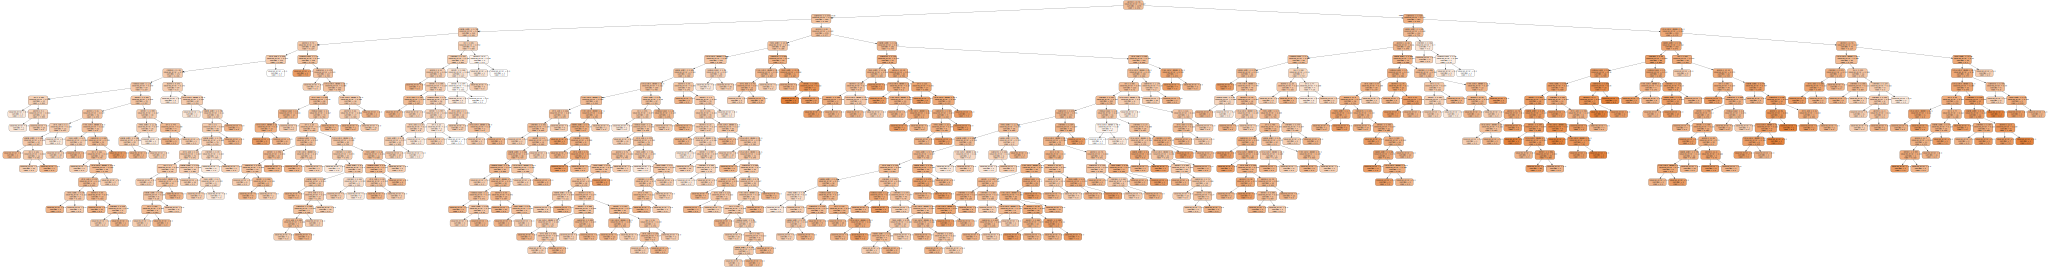

In [182]:
# Import necessary libraries
from sklearn.tree import export_graphviz
import graphviz

# Assuming 'regressor' is your trained Decision Tree Regressor or 'classifier' is your trained Decision Tree Classifier
# You can replace it with your actual trained model

# Generate the DOT format representation of the Decision Tree
dot_data = export_graphviz(regressor, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)  # For Decision Tree Classifier, use classifier instead of regressor
dot_data
# Create a Graphviz object and render the tree diagram
graph = graphviz.Source(dot_data,format="png")
graph

logistic regression

In [183]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [184]:
predictions = logisticRegr.predict(X_test)

In [185]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.6125


In [186]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 0  0  3  0  0  0]
 [ 0  0  4  8  0  0]
 [ 0  0 97 36  0  0]
 [ 0  0 37 98  2  0]
 [ 0  0  1 30  1  0]
 [ 0  0  0  3  0  0]]


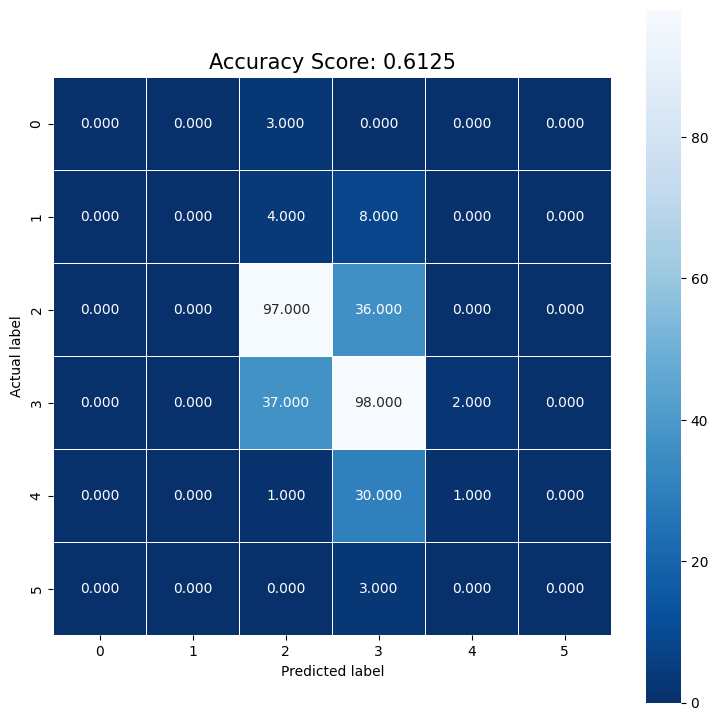

In [187]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

knn regression

In [188]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import math


In [189]:
knn_classifier = KNeighborsClassifier(n_neighbors=400)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

In [190]:
# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# You can also print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.503125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        12
           5       0.59      0.41      0.49       133
           6       0.47      0.77      0.58       137
           7       0.00      0.00      0.00        32
           8       0.00      0.00      0.00         3

    accuracy                           0.50       320
   macro avg       0.18      0.20      0.18       320
weighted avg       0.45      0.50      0.45       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
error=mean_squared_error(y_test,y_pred)
print(error)
y_pred

0.746875


array([6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6,
       6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6,

<Axes: xlabel='quality'>

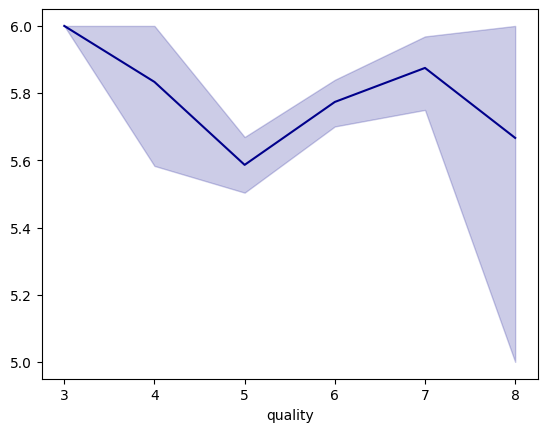

In [192]:
sns.lineplot(x=y_test,
                y=y_pred,c="DarkBlue")

decision tree classification

In [193]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [194]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


In [195]:
# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.63125


In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.33      0.42      0.37        12
           5       0.74      0.75      0.74       133
           6       0.67      0.55      0.61       137
           7       0.40      0.66      0.49        32
           8       0.00      0.00      0.00         3

    accuracy                           0.63       320
   macro avg       0.36      0.40      0.37       320
weighted avg       0.64      0.63      0.63       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


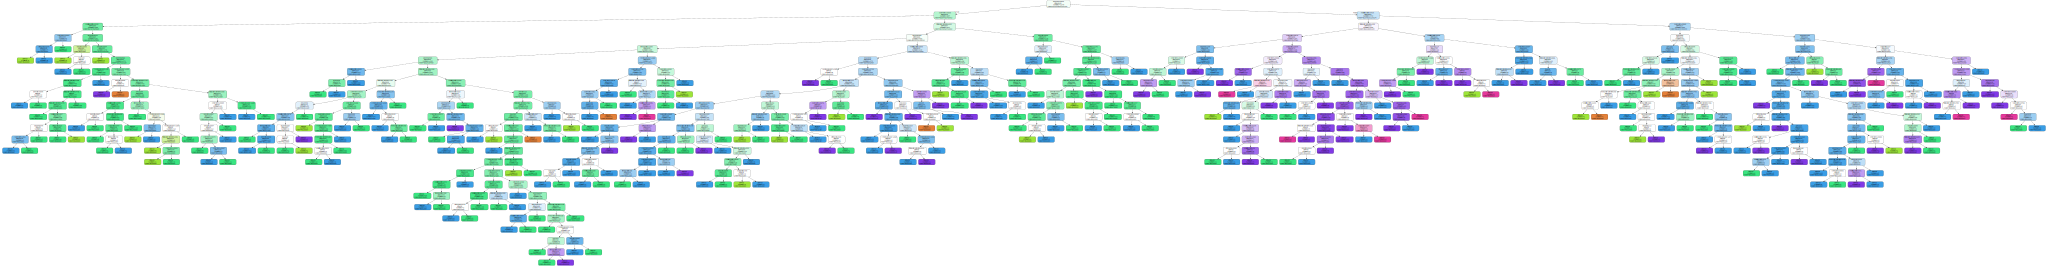

In [197]:
# Import necessary libraries
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(classifier, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
# graph.render("decision_tree")
# This will create a 'decision_tree.pdf' file in your current directory
graph


predicting the quality of white wine

In [198]:
df1=pd.read_csv("white_wine.csv")

In [199]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5.8,0.340,0.21,6.60,0.040,50.0,167.0,0.99410,3.29,0.62,10.0
1,6.5,0.350,0.36,0.80,0.034,32.0,111.0,0.98942,3.11,0.50,12.1
2,7.0,0.290,0.26,1.60,0.044,12.0,87.0,0.99230,3.08,0.46,10.5
3,6.4,0.280,0.29,1.60,0.052,34.0,127.0,0.99290,3.48,0.56,10.5
4,7.4,0.200,0.37,16.95,0.048,43.0,190.0,0.99950,3.03,0.42,9.2
...,...,...,...,...,...,...,...,...,...,...,...
1465,4.8,0.170,0.28,2.90,0.030,22.0,111.0,0.99020,3.38,0.34,11.3
1466,5.6,0.255,0.57,10.70,0.056,66.0,171.0,0.99464,3.25,0.61,10.4
1467,6.1,0.210,0.19,1.40,0.046,51.0,131.0,0.99184,3.22,0.39,10.5
1468,8.5,0.150,0.49,1.50,0.031,17.0,122.0,0.99320,3.03,0.40,10.3


In [200]:
df1.rename(columns = {"citric acid":"citric.acid","fixed acidity":"fixed.acidity","free sulfur dioxide":"free.sulfur.dioxide","residual sugar":"residual.sugar"
                      ,"total sulfur dioxide":"total.sulfur.dioxide","volatile acidity":"volatile.acidity"}, inplace = True)

In [201]:
x_test=df1.iloc[:,:]

In [202]:
y_predict = rnd.predict(x_test)
y_predict

array([5, 6, 6, ..., 6, 6, 5])

In [203]:
df1["quality"]=y_predict
df1

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,5.8,0.340,0.21,6.60,0.040,50.0,167.0,0.99410,3.29,0.62,10.0,5
1,6.5,0.350,0.36,0.80,0.034,32.0,111.0,0.98942,3.11,0.50,12.1,6
2,7.0,0.290,0.26,1.60,0.044,12.0,87.0,0.99230,3.08,0.46,10.5,6
3,6.4,0.280,0.29,1.60,0.052,34.0,127.0,0.99290,3.48,0.56,10.5,6
4,7.4,0.200,0.37,16.95,0.048,43.0,190.0,0.99950,3.03,0.42,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,4.8,0.170,0.28,2.90,0.030,22.0,111.0,0.99020,3.38,0.34,11.3,6
1466,5.6,0.255,0.57,10.70,0.056,66.0,171.0,0.99464,3.25,0.61,10.4,6
1467,6.1,0.210,0.19,1.40,0.046,51.0,131.0,0.99184,3.22,0.39,10.5,6
1468,8.5,0.150,0.49,1.50,0.031,17.0,122.0,0.99320,3.03,0.40,10.3,6
